Скачаем и импортируем prody и nglview.

# Автоматизация анализа. Процессы. Графики

In [1]:
import nglview as nv
import prody

## Задание 1. Хигнолин и его структура

Для этого задания было проведено моделирование самопроизвольного сворачивания маленького белка в растворе. Этот белок называется хигнолин, и, принимая во внимание его скромную длину всего в 10 остатков, его можно было бы и вовсе назвать пептидом. Однако же он демонстрирует одно важнейшее свойство белков -- возможность сворачиваться в одну определенную третичную структуру. Давайте ее изучим.

На kodomo лежит структура хигнолина в формате PDB. Скачайте ее и откройте в nglview/pymol.

In [2]:
!wget https://www.kodomo.fbb.msu.ru/FBB/year_21/structure/chignolin.pdb

--2024-12-29 15:20:18--  https://www.kodomo.fbb.msu.ru/FBB/year_21/structure/chignolin.pdb
Распознаётся www.kodomo.fbb.msu.ru (www.kodomo.fbb.msu.ru)… 93.180.63.127
Подключение к www.kodomo.fbb.msu.ru (www.kodomo.fbb.msu.ru)|93.180.63.127|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: https://kodomo.fbb.msu.ru/FBB/year_21/structure/chignolin.pdb [переход]
--2024-12-29 15:20:18--  https://kodomo.fbb.msu.ru/FBB/year_21/structure/chignolin.pdb
Распознаётся kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)… 93.180.63.127
Подключение к kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 11209 (11K) [chemical/x-pdb]
Сохранение в: «chignolin.pdb.1»

chignolin.pdb.1     100%[===================>]  10,95K  --.-KB/s    за 0s      

2024-12-29 15:20:19 (52,7 MB/s) - «chignolin.pdb.1» сохранён [11209/11209]



In [3]:
view = nv.show_structure_file('chignolin.pdb')
view

NGLWidget()

Изучите структуру и выпишите последовательность этого белка в однобуквенном коде.

Опишите, что дает нам право говорить, что это свернутый белок? Есть ли вторичная структура, какая? Если есть, создайте отображение, где были бы видны атомы и связи, и между атомами, вступающими в остов-остовные водородные связи, было создано отображение типа **distance** через функцию **add_representation**. У этого отображения вместо атрибута selection атрибут `atom_pair = [[selection, selection]]`. Можно давать несколько таких пар: `[[selection, selection], [selection, selection], [..,..], ...].`

## Задание 2. Фолдинг хигнолина

Давайте теперь своими глазами проследим за процессом самопроизвольного сворачивания этого крошечного белка. Тут нам нужен будет еще один модуль, выступающий вспомогательным для nglview.

In [4]:
import mdtraj

Выберите себе вариант для работы из [папки](https://drive.google.com/drive/folders/1E6O3MWfX0KvBVQxptPebBhttvTBzS9Rj?usp=sharing), далее используйте траекторию оттуда(\<id\>.dcd) вместо моей.

In [5]:
!wget https://www.kodomo.fbb.msu.ru/FBB/year_21/structure/traj.dcd

--2024-12-29 15:20:32--  https://www.kodomo.fbb.msu.ru/FBB/year_21/structure/traj.dcd
Распознаётся www.kodomo.fbb.msu.ru (www.kodomo.fbb.msu.ru)… 93.180.63.127
Подключение к www.kodomo.fbb.msu.ru (www.kodomo.fbb.msu.ru)|93.180.63.127|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: https://kodomo.fbb.msu.ru/FBB/year_21/structure/traj.dcd [переход]
--2024-12-29 15:20:33--  https://kodomo.fbb.msu.ru/FBB/year_21/structure/traj.dcd
Распознаётся kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)… 93.180.63.127
Подключение к kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 1738012 (1,7M) [application/DCD]
Сохранение в: «traj.dcd»

traj.dcd            100%[===================>]   1,66M  2,96MB/s    за 0,6s    

2024-12-29 15:20:34 (2,96 MB/s) - «traj.dcd» сохранён [1738012/1738012]



In [6]:
trajectory = mdtraj.load('traj.dcd', top='chignolin.pdb')
view = nv.show_mdtraj(trajectory, default_representation=False)
view.add_representation('ball+stick', color_scheme='element')
view.center()
view

NGLWidget(max_frame=1000)

Перед вами 300-наносекундный фрагмент из жизни хигнолина, который исходно находился в полностью расправленном состоянии. Вам дано 1000 "кадров", каждый из которых соответствует продвижению на 0.3 наносекунды, плюс стартовое состояние.

У каждого студента свой личный хигнолин и его жизнь. В вашем случае, произошло ли за 300 наносекунд сворачивание? Если да, то на каком приблизительно кадре?

## Задание 3. Понижение размерности

Вы можете заметить, что делать выводы, особенно количественные, по полной траектории сложно: не ясно, что назвать моментом сворачивания, все атомы постоянно шевелятся. Также влияют и технические моменты: не каждый кадр успевает обработаться, и отображению может не хватать плавности. Что делать в таком случае?

Исследователи любят упрощать процессы, с которыми работают, до наблюдения за минимумом переменных. В идеале за одной. Значение этой переменной в момент времени t должно в идеале содержать в себе максимум информации о изучаемом процессе, значимой для исследователя.

Давайте подумаем, что может быть такой переменной для нашего процесса. Ключевую роль в нем играет образование водородных связей -- ни солевых мостиков, ни стэкинга, ни гидрофобных ядер в свернутой структуре не наблюдается. Можем ли мы как-то обыграть этот момент? Конечно, можем!

Назовем "правильными" водородными связями те, которые присутствуют в данной "свернутой" структуре.

Изучим процесс в отображении на следующие переменные:
 * Число водородных связей в момент времени
 * Число "правильных" водородных связей в момент времени
 * Число "неправильных" водородных связей в момент времени

Нам необходимо, таким образом,
 * Определить "правильные" водородные связи
 * Написать код для сбора этих данных по траектории

Обе задачи нам будет удобно сделать с помощью ProDy.

### Правильные водородные связи

In [7]:
protein = prody.parsePDB('chignolin.pdb')

@> 138 atoms and 1 coordinate set(s) were parsed in 0.00s.


Нужно определить все атомы, которые могут быть донорами и акцепторами в нашей структуре.

In [36]:
polar_atoms = protein.select('not element C H')

donors = {}
# Доноров оформим в виде словаря, где ключом будет номер атома-донора
# А значением -- список из номеров водородов, связанных с этим атомом

for atom in polar_atoms:
    atom_index = atom.getIndex() # получаем номер атома
    atom_bonded_h = protein.select(f'hydrogen within 1.2 of index {atom_index}')
    # Допишите код, чтобы поолучить все водороды, находящиеся не далее 1.2 ангстрем от атома

    # Делаем проверку на то, что такие водороды вообще есть
    if atom_bonded_h:
        elements = set(atom_bonded_h.getElements())
        assert len(elements) == 1
        assert str(list(elements)[0]) == 'H'
        h_indices = atom_bonded_h.getIndices()
        donors[atom_index] = h_indices


In [39]:
acceptors = []
# Акцепторов оформим в виде списка индексов

# Так как неподеленная пара отсутствует как объект в файле PDB, нам придется
# подключить ручной анализ: вручную определить атомы, которые никак не могут
# быть акцепторами в нашем белке. Например, атом N остова. Изучите структуру
# и найдите остальные случаи!
allowed_acceptors = {'OG1', 'OH', 'NE1', 'OD1', 'OD2', 'OE1', 'OE2', 'O'}
for atom in polar_atoms:
    if atom.getName() in allowed_acceptors:
        acceptors.append(atom.getIndex())

Теперь найдем водородные связи. Будем перебирать все пары доноров и акцепторов и смотреть на геометрию взаимодействия. Если она хороша, будем обзывать эту ситуацию валидной водородной связью.

In [40]:
def find_hb(structure, donors, acceptors):
    hbonds = []
    for d_index in donors.keys():
        for a_index in acceptors:
            if is_hb(structure, d_index, a_index):
                hbonds.append((d_index, a_index))
    return hbonds

In [41]:
def is_hb(structure, d_index, a_index, max_d=3.5, min_a=130):
    # В этом практикуме используем расслабленный критерий на угол: не менее 130,
    # чтобы найти даже слабые водородные связи.

    d = prody.calcDistance(structure[d_index],
                           structure[a_index])
    if d <= max_d:
        for h_index in donors[d_index]:
            # Смотрим на все возможные водороды, если хотя бы один подходит --
            # значит, связь есть

            a = prody.calcAngle(structure[d_index],
                                structure[h_index],
                                structure[a_index])
            if a >= min_a:
                return True
    return False

In [42]:
true_hbonds = find_hb(protein, donors, acceptors)
true_hbonds

[(0, 129), (30, 91), (56, 38), (71, 38), (81, 38), (85, 41), (106, 8)]

In [43]:
print('Resname', 'Resnum', 'Atomname', sep='\t')

for hb in true_hbonds:
    d = protein[hb[0]]
    a = protein[hb[1]]

    print(d.getResname(), d.getResnum(), d.getName(),
          '---',
          a.getResname(), a.getResnum(), a.getName(),
          sep='\t')

Resname	Resnum	Atomname
GLY	1	N	---	TRP	9	O
ASP	3	N	---	GLY	7	O
GLU	5	N	---	ASP	3	OD1
THR	6	N	---	ASP	3	OD1
THR	6	OG1	---	ASP	3	OD1
GLY	7	N	---	ASP	3	O
TRP	9	N	---	GLY	1	O


Здесь есть одна проблема: два кислорода бокового радикала аспартата неразличимы. Это значит, что если в какой-то момент времени группа -COO развернется на 180 градусов, она функционально останется неизменной. Имена атомов существуют только в головах людей. Нужно подготовиться к такой ситуации и добавить в список **true_hbonds** копии водородных связей к атому OD1, где вместо него указан OD2. Напишите код для этого самостоятельно!

### Поиск водородных связей вдоль траектории

In [44]:
# Загрузим траекторию в prody
traj = prody.Trajectory('traj.dcd')
traj.link(protein)

In [45]:
num_hbonds = {
    'all': [],
    'true': [],
    'false': []
}

In [46]:
for frame in traj:
    frame_hbonds = find_hb(protein, donors, acceptors)
    num_hbonds['all'].append(len(frame_hbonds))

    true_hb, false_hb = 0, 0
    for hb in frame_hbonds:
        if hb in true_hbonds:
            true_hb += 1
        else:
            false_hb += 1

    num_hbonds['true'].append(true_hb)
    num_hbonds['false'].append(false_hb)

/Users/avgindulli/miniconda3/envs/biophys/lib/python3.11/site-packages/prody/measure/measure.py:167: RuntimeWarning: invalid value encountered in arccos
  rad = arccos((v1*v2).sum(-1) / ((v1**2).sum(-1) * (v2**2).sum(-1))**0.5)


Мы получили наши игреки -- число водородных связей в каждый момент времени. Теперь нужно задать икс -- собственно, время, -- и можно строить графики.

In [47]:
time = [0.3*x for x in range(1001)]

In [48]:
import matplotlib.pyplot as plt

**matplotlib** это встроенный в python пакет для построения разнообразных типов графиков. Их так много, что запомнить, как все строить и с какими параметрами, невозможно -- всегда гуглите и изучайте документацию. В этом практикуме у нас есть время только на самые основные вещи.

Любое творение в matplotlib это Figure. Figure состоит из отдельных панелей с осями икс и игрек, отсюда панель зовется Axes ("оси"). На каждой панели можно помещать графики, делать подписи. У Figure как целого тоже может быть подпись.

Ниже представлен самый простой пример использования matplotlib. Когда в будущем будете готовить графики для курсовых, уделите этому пакету особое внимание: в нем есть все нужное.

/var/folders/vp/kn0lwtz530ld47p3yqfvvj4nft_m2g/T/ipykernel_78058/3747449385.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


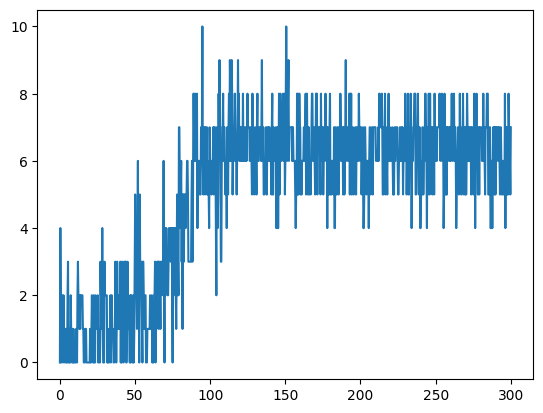

In [49]:
fig,ax = plt.subplots() # аргументы не даны, поэтому панель только одна, помещена в ax

ax.plot(time, num_hbonds['all'])
# простая линия, соединяющая точки. Икс-координаты идут в первом массиве,
# игрек-координаты во втором

fig.show()

Построим теперь все три метрики одновременно. Matplotlib присвоит им разные цвета.

/var/folders/vp/kn0lwtz530ld47p3yqfvvj4nft_m2g/T/ipykernel_78058/1345339888.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


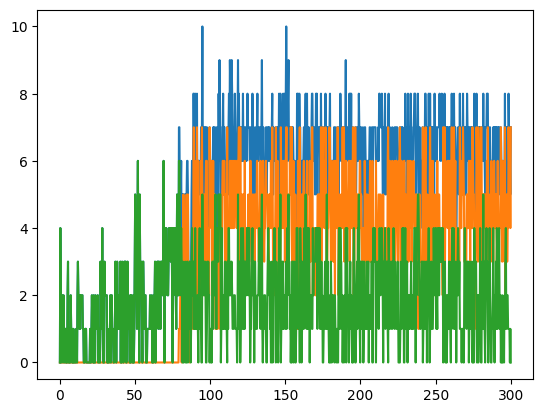

In [50]:
fig,ax = plt.subplots()
ax.plot(time, num_hbonds['all'])
ax.plot(time, num_hbonds['true'])
ax.plot(time, num_hbonds['false'])
fig.show()

Однако, не понятно, где что. Нужно добавить подписи!

/var/folders/vp/kn0lwtz530ld47p3yqfvvj4nft_m2g/T/ipykernel_78058/361516979.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


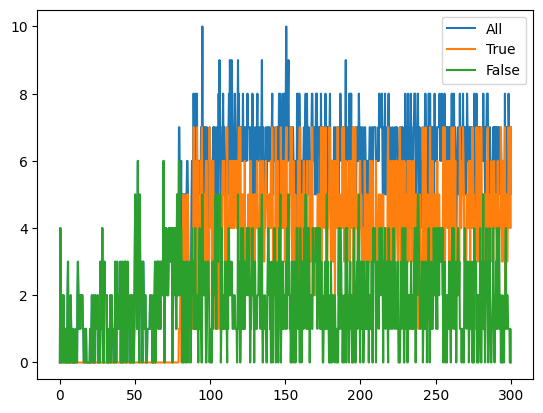

In [51]:
fig,ax = plt.subplots()
ax.plot(time, num_hbonds['all'], label='All')
ax.plot(time, num_hbonds['true'], label='True')
ax.plot(time, num_hbonds['false'], label='False')
ax.legend()
fig.show()

Конечно, можно давать свои цвета. Также нам явно не хватает подписей осей -- никогда не забывайте их в отчетах и курсовых!

/var/folders/vp/kn0lwtz530ld47p3yqfvvj4nft_m2g/T/ipykernel_78058/690822485.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


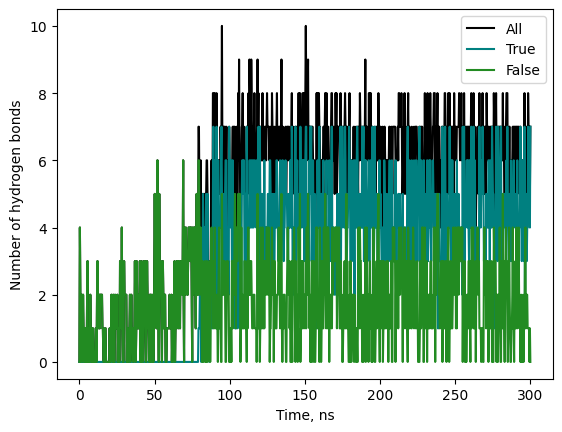

In [52]:
fig,ax = plt.subplots()
ax.plot(time, num_hbonds['all'], label='All', color='black')
ax.plot(time, num_hbonds['true'], label='True', color='teal')
ax.plot(time, num_hbonds['false'], label='False', color='forestgreen')
ax.legend()
ax.set_xlabel('Time, ns')
ax.set_ylabel('Number of hydrogen bonds')
fig.show()

Стало лучше, но все же это не очень информативный график -- линии наслаиваются друг на друга. Также мы видим явную проблему дискретности нашей переменной: график выходит не плавным, а постоянно скачет вверх-вниз из-за какой-то одной слабой водородной связи.

Но мы можем это исправить! И мало того, что мы сделаем картинку лучше, мы сделаем анализ корректнее с помощью следующей идеи. Когда мы изучаем какой-то процесс, связанный с структурами белков, нам всегда стоит принимать их тепловые движения, колебания как естественный порядок вещей при комнатной температуре. Водородные связи в нормальном свернутом белке разрываются, снова образуются и снова разрываются, но общая структура остается неизменной. Отсюда, становится не столь важно, есть или нет водородная связь в каждом конкретном кадре. Более показательно, как часто она образовывалась за определенную дельту времени.

Чтобы это посмотреть, нам нужно преобразовать наши игреки таким образом, чтобы каждому моменту времени соответствовало среднее число водородных связей в течение времени t до этого момента. Такое преобразование называется [скользящим средним](https://en.wikipedia.org/wiki/Moving_average).

In [53]:
# Изучив раздел про простое скользящее среднее (Simple Moving Average) по ссылке
# на Вики, исправьте код, чтобы он стал верным

def moving_average(Y, window):
    averaged = []
    L = len(Y)

    sma_prev = sum(Y[:window])/window
    averaged.append(sma_prev)

    for i in range(window, L):
        sma_i = sma_prev + (Y[i] - Y[i-window])
        averaged.append(sma_i)
        sma_prev = sma_i

    return averaged

In [54]:
window = 50 # будем усреднять метрику по 50 кадрам

time_ma = time[(window-1):]

num_hbonds_ma = {
    'all': moving_average(num_hbonds['all'], window),
    'true': moving_average(num_hbonds['true'], window),
    'false': moving_average(num_hbonds['false'], window)
}

/var/folders/vp/kn0lwtz530ld47p3yqfvvj4nft_m2g/T/ipykernel_78058/39038645.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


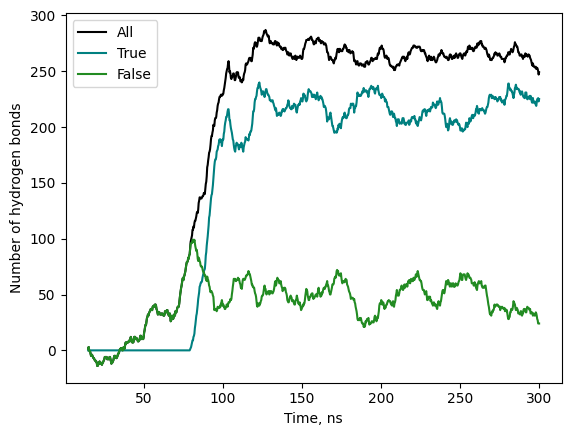

In [55]:
fig,ax = plt.subplots()
ax.plot(time_ma, num_hbonds_ma['all'], label='All', color='black')
ax.plot(time_ma, num_hbonds_ma['true'], label='True', color='teal')
ax.plot(time_ma, num_hbonds_ma['false'], label='False', color='forestgreen')
ax.legend()
ax.set_xlabel('Time, ns')
ax.set_ylabel('Number of hydrogen bonds')
fig.show()

Мы получили гораздо более читаемый и наглядный график! Глядя на него, ответьте на вопросы:
 * Свернулся ли у вас хигнолин
 * Если да, сколько водородных связей характерно для вашего свернутого состояния
 * Какое время вы можете зафиксировать как время принятия хигнолином стабильной структуры?
 * Если выбирать только одну метрику из представленных, какая лучше всего описывает процесс принятия правильной структуры?
 * Если выбирать только одну метрику из представленных, какая лучше всего описывает процесс принятия какой-либо стабильной структуры?

А также на вопросы на понимание. Рассмотрите несколько гипотетических случаев и опишите, что они значат с точки зрения сворачивания белка:
 * График стабилизировался, All очень низкий (1)
 * График стабилизировался, All высокий (6), True низкий (1)